# Linear Regression

This notebook will hopefully contain everything I find figure out about Linear Regression. Although I have learned this multiple times, however this notebook is more to make this knowledge concrete with fundamentals. This will keep changing as I learn and connect more dots.

## Statistics view of Linear Regression
In this section we are going to study Linear Regression as applications of probability and statistics in data science.
### Linear Function
A linear function is a constant relationship between a independent variable $x$ and dependent variable $y$ and is represented by a line.
$$
y = \text{slope} * x + \text{intercept}
$$


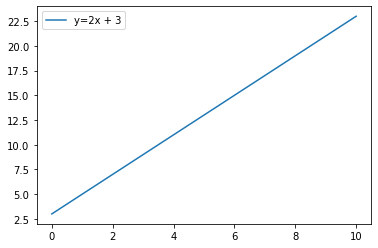

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10)
plt.plot(x,  2 * x + 3, linestyle='solid', label="y=2x + 3")
plt.legend()
plt.show()


When $x$ is zero, we apply the line formala, we get the *intercept* value. In this case, intercept is 3.

The another parameter is *slope*. Slope is the steepness of the line. 
The slope is defined as the ratio of the vertical change between two points, the *rise*, to the horizontal change between the same two points, the *run*.

$$
\text{slope} = \frac{\text{rise}}{\text{run}} = \frac{\text{change in y}}{\text{change in x}}
$$

In this case the slope of the line is 2.

Now consider a case when we add a random number to the value of the function.

$$
y = \text{slope} * x + \text{intercept} + \textit{random number}
$$

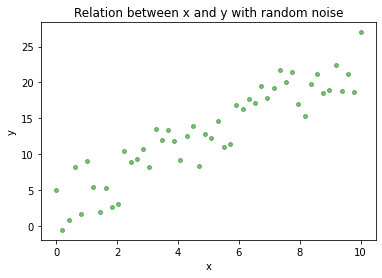

In [25]:
import random
np.random.seed(21)
x = np.linspace(0, 10)
y_vals = []
for i in range(len(x)):
    y_vals.append(2*x[i] + 3 + random.randint(-4, 4))
y = np.array(y_vals)
area = np.pi*5
plt.scatter(x, y, s=area, c='green', alpha=0.5)
plt.title('Relation between x and y with random noise')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Our data is not really a line anymore, but it does show some linear behaviour visually. As the value of x increases, y also increases. 

The real world data may exhibit such linear behaviour in similar way, there is always some noise or randomness in the data.

We don't know that relationship (i.e. like equation in above case). 

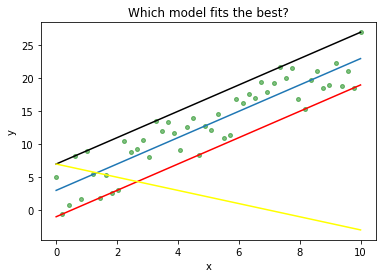

In [34]:
plt.scatter(x, y, s=area, c='green', alpha=0.5)
plt.plot(x,  2 * x + 3, linestyle='solid', label="y=2x + 3")
plt.plot(x,  2 * x - 1, linestyle='solid', c='red', label="y=2x - 1")
plt.plot(x,  2 * x + 7, linestyle='solid', c='black', label="y=2x + 7")
plt.plot(x,  -x + 7, linestyle='solid', c='yellow', label="y=-x + 7")
plt.title('Which model fits the best?')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The goal is then to determine this relationship, 
* Is it linear? (let's assume it is for now)
* If so what is the best line which fits this data i.e. the best model to represent this data.(red, blue, black or yellow)
* What is the criteria to choose the best model?
* What are the parameters of the model?

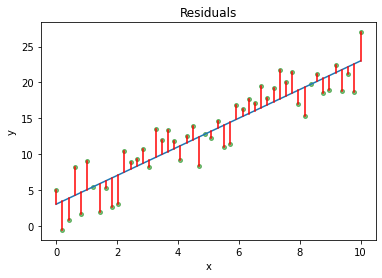

In [42]:
plt.scatter(x, y, s=area, c='green', alpha=0.5)
plt.plot(x,  2 * x + 3, linestyle='solid', label="y=2x + 3")


# now add individual line for each point
for i in range(len(x)):
    lineXdata = (x[i], x[i]) # same X
    lineYdata = ((2*x[i]+3), y[i]) # different Y
    plt.plot(lineXdata, lineYdata, color='red')


plt.title('Residuals')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In this plot, the data are green dots, and the model is the blue line. The red lines called *residuals* represent the distance between the data and the model. Intituitively, the smaller the residuals the better the model is i.e. closer it is to the real data. Therefore, if we calculate all the residuals add them up, we can start looking for the slope and intercept that minimize the residuals. This is the foundation of many data science algorithms. We try to find the model parameters which minimizes the distance between the model prediction and the real data.